In [18]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/Cen X-4.txt")

Cen X-4
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,Cen X-4,68,[van den Eijnden et al. 2022 & https://ui.adsa...,[van den Eijnden et al. 2022 & https://ui.adsa...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,Cen X-4,1601122564,L,59118.62333,0.1667,quiescence,QS,0.0129,0.0043,4.3,NaN,NaN,True
1,Cen X-4,1610014143,L,59221.43520,0.0104,quiescence,QS,0.0690,0.0230,23.0,NaN,NaN,True
2,Cen X-4,1610180483,L,59223.36520,0.0104,quiescence,QS,0.0540,0.0180,18.0,NaN,NaN,True
3,Cen X-4,1610782322,L,59230.32520,0.0104,quiescence,QS,0.0480,0.0160,16.0,NaN,NaN,True


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,Cen X-4,88937006,59118.52,0.034330,quiescence,QS,3.500000e-13,1.059481e-13,1.059481e-13,tbabs*(nsatmos + powerlaw),cstat,False
1,Cen X-4,35324068,59211.46,0.009112,quiescence,QS,2.900000e-12,6.664083e-13,6.664083e-13,tbabs*(nsatmos + power law) with template para...,cstat,False
2,Cen X-4,35324069,59214.25,0.005998,quiescence,QS,4.500000e-12,1.855398e-12,1.855398e-12,tbabs*(nsatmos + power law) with template para...,cstat,False
3,Cen X-4,35324070,59218.96,0.011264,quiescence,QS,1.100000e-11,1.486607e-12,1.486607e-12,tbabs*(nsatmos + powerlaw),cstat,False


# Light Curves

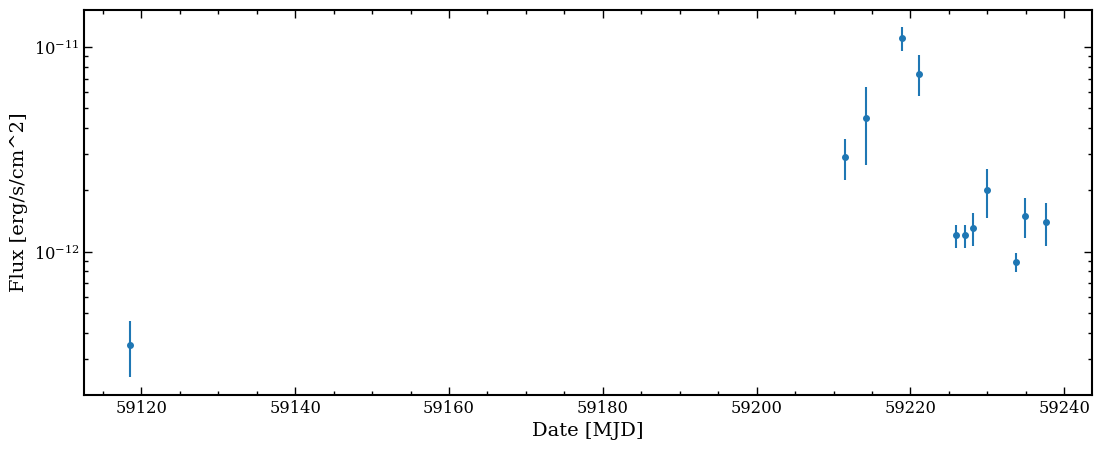

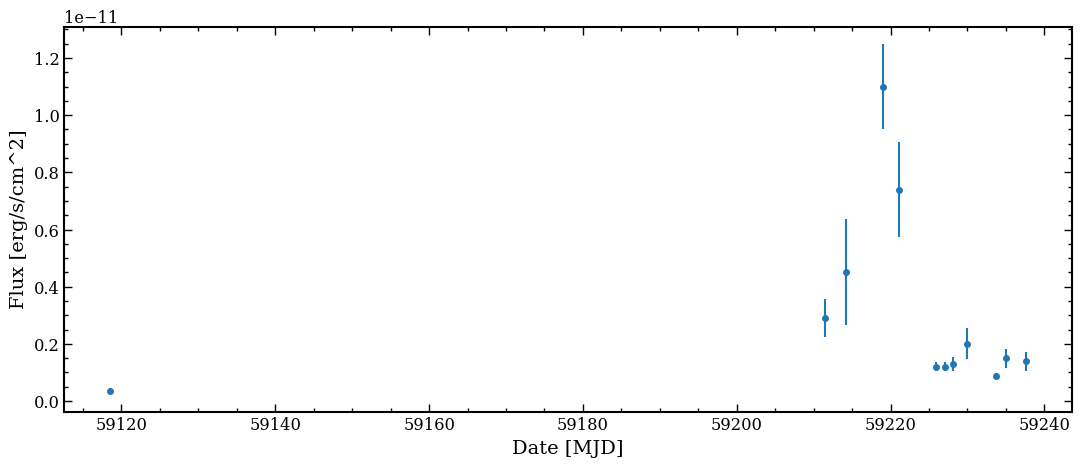

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

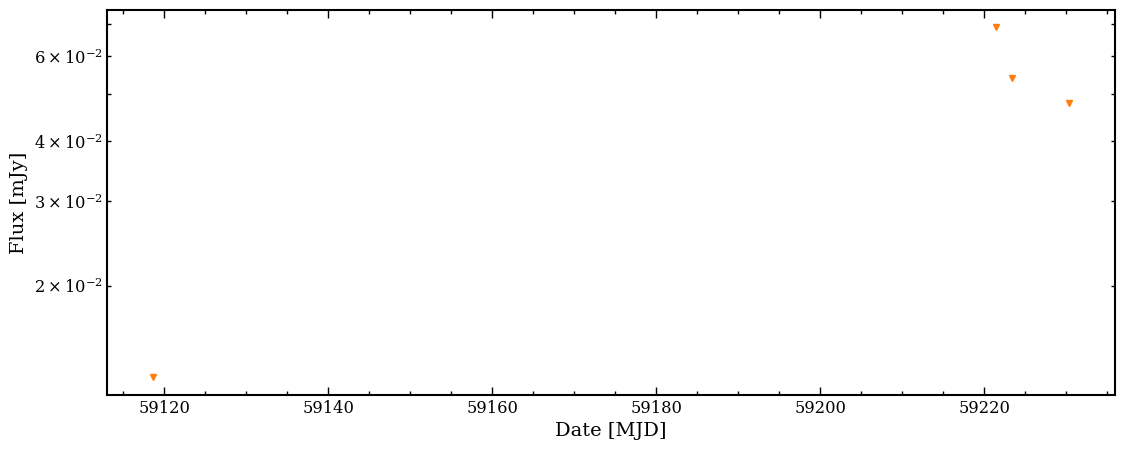

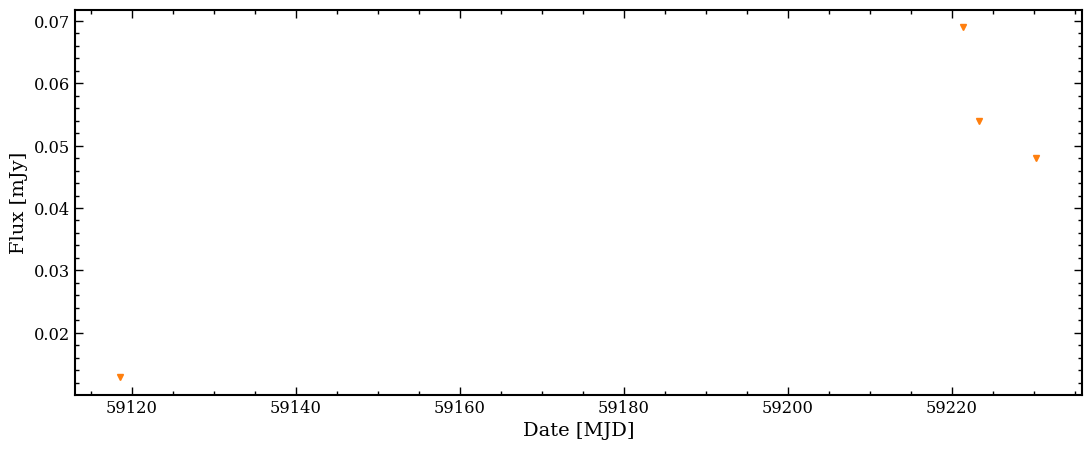

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

NOTE: The additional point in Jakob's paper is from NICER.

Besides that, the results are the same as in the paper.

In [10]:
# For comparison, get the 5GHz fluxes
# For comparison, get for 1.2kpc
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df, nu_GHz=5, d_kpc=1.2, save = False)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59118.623330000     0.01290             0.00430             1         3.50000e-13                   1.05948e-13                   1.05948e-13                   True           False          QS             
59221.435200000     0.06900             0.02300             1         7.40000e-12                   1.67260e-12                   1.67260e-12                   True           False          QS             
59230.325200000     0.04800             0.01600             1         2.00000e-12                   5.38516e-13                   5.38516e-13                   True           False          QS             
Converting to luminosity using d_kpc = 1.2


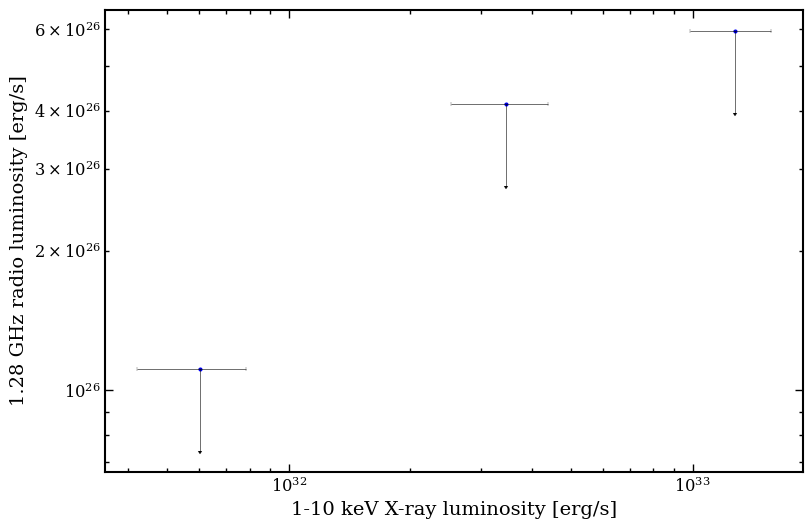

In [13]:
plot_Lr_Lx(paired_data)

In [14]:
# Now run with updated distance, 1.28 GHz
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59118.623330000     0.01290             0.00430             1         3.50000e-13                   1.05948e-13                   1.05948e-13                   True           False          QS             
59221.435200000     0.06900             0.02300             1         7.40000e-12                   1.67260e-12                   1.67260e-12                   True           False          QS             
59230.325200000     0.04800             0.01600             1         2.00000e-12                   5.38516e-13                   5.38516e-13                   True           False          QS             
Converting to luminosity using d_kpc = 1.87


In [16]:
lr_all, lx_all, all_types = get_bahramian_data()

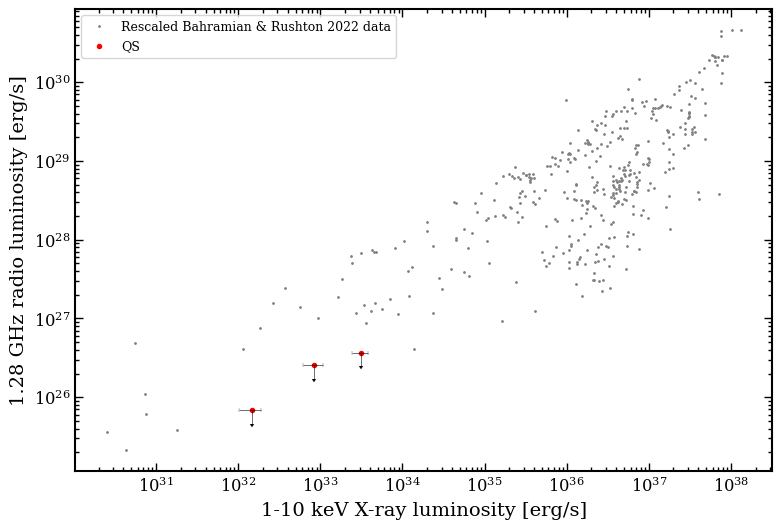

In [17]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)